In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Input
from tensorflow.keras.layers import Conv1D,MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import ADASYN
from sklearn import metrics

In [2]:
data=pd.read_csv("creditcard.csv")

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info


<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
fraud=data[data['Class']==1]
non_fraud=data[data['Class']==0]
non_fraud=non_fraud.sample(int(non_fraud.shape[0]/2))
non_fraud.shape,fraud.shape

((142157, 31), (492, 31))

In [19]:
X=data.drop('Class', axis=1)
y=pd.DataFrame(data['Class'])


In [20]:
X.shape,y.shape,type(X),type(y)

((284807, 30),
 (284807, 1),
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)#prepared for training and testing data set

In [22]:
sm=ADASYN()
X_train,y_train=sm.fit_sample(X_train,y_train)

In [23]:
data_X=pd.DataFrame(data=X_train, columns=X_train.columns)
data_y=pd.DataFrame(data=y_train, columns=['Class'])
smote_data=data_X
smote_data['Class']=data_y['Class']
data=smote_data

In [24]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.000000,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.670000,0
1,22555.000000,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.940000,0
2,2431.000000,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.000000,0
3,86773.000000,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.780000,0
4,127202.000000,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.960000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455006,149475.747268,-0.109756,1.401914,-4.176816,3.343579,1.859784,-2.100166,-1.096727,0.443252,-1.427073,...,0.216087,-0.159903,0.131413,-0.010107,-0.112895,-0.307001,0.185688,0.032990,1.593434,1
455007,149234.140056,-1.337020,0.016750,-2.819544,2.688801,4.474410,-3.269781,-0.129441,-0.010562,-0.962336,...,-0.045772,-0.602333,0.070173,-0.591993,0.371575,-0.365223,0.018257,0.148295,0.986715,1
455008,149013.793901,-1.299085,1.058767,-3.880459,3.049975,3.067882,-2.921495,-0.858933,0.320646,-1.521653,...,0.312626,-0.029945,0.035389,-0.341752,-0.080625,-0.288174,0.218628,0.300949,0.929830,1
455009,149087.716057,-1.323001,0.698071,-3.512670,2.917090,3.548072,-3.043869,-0.612724,0.209225,-1.325748,...,0.192635,-0.219371,0.047633,-0.427781,0.069729,-0.315712,0.149878,0.249366,0.953173,1


In [25]:
fraud=data[data['Class']==1]
non_fraud=data[data['Class']==0]
fraud.shape,non_fraud.shape

((227560, 31), (227451, 31))

In [26]:
#split into X and y. Features
X=data.drop('Class', axis=1) #take all the columns except class
y=data['Class']# take columns with class 

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)#prepared for training and testing data set

In [28]:
X_train.shape,X_test.shape #to check the size of training datasets

((364008, 30), (91003, 30))

In [29]:
#the scale of X_train data is very differet.
#we do the standarise of the data to reduce chance of overfitting
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [30]:
#the result of training set will be numpy array. So chage y to numpy
y_train=pd.DataFrame(y_train).to_numpy()
y_test=pd.DataFrame(y_test).to_numpy()
print("hello")
#CNN works on 3D. So we need to reshape the vlaues

hello


In [31]:
X_train.shape

(364008, 30)

In [32]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [33]:
X_train.shape,X_test.shape #the new shape is 3D


((364008, 30, 1), (91003, 30, 1))

In [34]:
#building CNN
input_shape=X_train[0].shape
input_shape

(30, 1)

In [50]:
epochs=40
model=Sequential()

model.add(Conv1D(32,2, activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv1D(512,2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv1D(128,2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_10 (Batc (None, 29, 32)            128       
_________________________________________________________________
dropout_14 (Dropout)         (None, 29, 32)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_11 (Batc (None, 28, 64)            256       
_________________________________________________________________
dropout_15 (Dropout)         (None, 28, 64)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 27, 512)          

In [52]:
model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=epochs, validation_data=(X_test,y_test),verbose=1)

Train on 364008 samples, validate on 91003 samples
Epoch 1/40
364008/364008 [==============================] - 919s 3ms/sample - loss: 0.0738 - accuracy: 0.9742 - val_loss: 0.0219 - val_accuracy: 0.9937
Epoch 2/40
364008/364008 [==============================] - 901s 2ms/sample - loss: 0.0336 - accuracy: 0.9886 - val_loss: 0.0146 - val_accuracy: 0.9953
Epoch 3/40
364008/364008 [==============================] - 1025s 3ms/sample - loss: 0.0235 - accuracy: 0.9921 - val_loss: 0.0080 - val_accuracy: 0.9982
Epoch 4/40
364008/364008 [==============================] - 952s 3ms/sample - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0073 - val_accuracy: 0.9982
Epoch 5/40
364008/364008 [==============================] - 953s 3ms/sample - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0050 - val_accuracy: 0.9990
Epoch 6/40
364008/364008 [==============================] - 931s 3ms/sample - loss: 0.0140 - accuracy: 0.9952 - val_loss: 0.0057 - val_accuracy: 0.9987
Epoch 7/40
364008/364008 [==========

In [42]:
history.history

{'loss': [0.07843398962523822,
  0.04205864595454486,
  0.031737988857296895,
  0.025259300196426613,
  0.022331280845919853,
  0.020014285016826987,
  0.017944998361706176,
  0.016841186606973157,
  0.015547756380235157,
  0.015181151385688362,
  0.014146467325920113,
  0.013835335409612437,
  0.013332832151307148,
  0.01272057599774856,
  0.012550488903408395,
  0.012048031968697507,
  0.011935043729263064,
  0.01175615045383403,
  0.011203890154464073,
  0.011473477172092197],
 'accuracy': [0.9727973,
  0.98586845,
  0.9894343,
  0.99153316,
  0.99292046,
  0.9935716,
  0.9942364,
  0.9948408,
  0.99517596,
  0.995393,
  0.99568415,
  0.9959534,
  0.99600834,
  0.9960358,
  0.99624735,
  0.99632424,
  0.99649185,
  0.9964808,
  0.9965248,
  0.9966182],
 'val_loss': [0.030551769988266433,
  0.018463656404011496,
  0.012270010091085016,
  0.009947242763526203,
  0.008784510140908386,
  0.007642109914144244,
  0.00703230670773551,
  0.007338695566537989,
  0.0068163059580551855,
  0.00

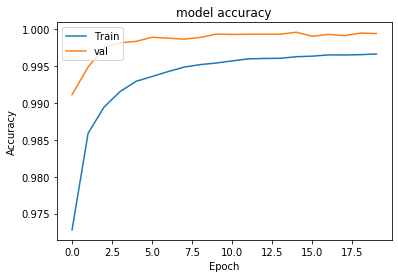

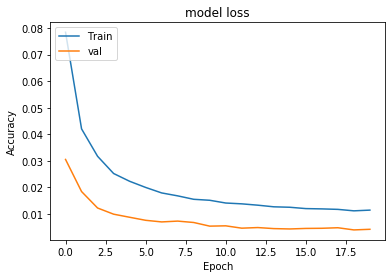

In [43]:
#plot of accuracy and other mertics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

#for validation loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

In [44]:

from sklearn.metrics import roc_curve, auc
# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

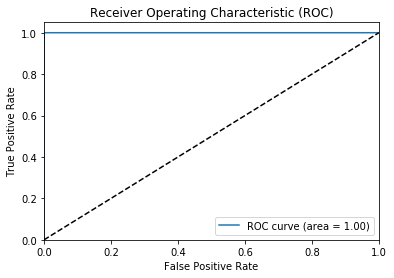

In [45]:
pred = model.predict(X_test)
plot_roc(pred,y_test.round())

In [47]:
from IPython.display import display

# Don't display numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Generate predictions


print("Numpy array of predictions")
display(pred[0:5])

print("As percent probability")
print(pred[0]*100)

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

Numpy array of predictions


array([[1.    ],
       [0.    ],
       [0.0035],
       [0.0003],
       [1.    ]], dtype=float32)

As percent probability
[99.9999]
Log loss score: nan


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2295: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2295: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
